## Programming Language : Python

<img align='left' src='https://github.com/harveenchadha/Breast_Cancer_Prediction/blob/master/images/python.jpeg?raw=1' > 

## Problem Statement

Breast cancer (BC) is one of the most common cancers among women worldwide, representing the majority of new cancer cases and cancer-related deaths according to global statistics, making it a significant public health problem in today’s society.

The early diagnosis of BC can improve the prognosis and chance of survival significantly, as it can promote timely clinical treatment to patients. Further accurate classification of benign tumors can prevent patients undergoing unnecessary treatments. Thus, the correct diagnosis of BC and classification of patients into malignant or benign groups is the subject of much research. Because of its unique advantages in critical features detection from complex BC datasets, machine learning (ML) is widely recognized as the methodology of choice in BC pattern classification and forecast modelling.

<b>There are two main classifications of tumors. One is known as benign and the other as malignant. A benign tumor is a tumor that does not invade its surrounding tissue or spread around the body. A malignant tumor is a tumor that may invade its surrounding tissue or spread around the body.</b>

<hr>

## Dataset

1. https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)
2. https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

## Step 0: Importing Libraries

In [0]:
## For Data Manipulation: Provides Dataframe as the datastructure to hold data
import pandas as pd

<img src='https://github.com/harveenchadha/Breast_Cancer_Prediction/blob/master/images/pandas_logo.png?raw=1' >

In [0]:
## For Faster data computation: Provides multidimentional array support to hold and manipulate data
import numpy as np

<img src='https://github.com/harveenchadha/Breast_Cancer_Prediction/blob/master/images/numpy.jpeg?raw=1' >

In [0]:
## For Data Visualization
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

<img src='https://github.com/harveenchadha/Breast_Cancer_Prediction/blob/master/images/matplotlib.png?raw=1' >

In [4]:
pip install tensorflow==2.0.0-alpha0

    100% |████████████████████████████████| 79.9MB 271kB/s 
    100% |████████████████████████████████| 61kB 23.4MB/s 
    100% |████████████████████████████████| 419kB 21.1MB/s 
    100% |████████████████████████████████| 3.0MB 10.5MB/s 
  Found existing installation: tensorflow 1.13.1
    Uninstalling tensorflow-1.13.1:
      Successfully uninstalled tensorflow-1.13.1


In [0]:
import tensorflow as tf

In [6]:
tf.__version__

'2.0.0-alpha0'

## Step 1: Question

1. What are the factors that contribute to malignant and benign tumor?
2. Is the problem stated as classification or regression problem?
3. Our final model is capable enough to predict the diffence between two types?

## Step 2: Wrangle Data

### Step 2.1: Gathering Data

In [7]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [0]:
df = pd.read_csv('./data.csv') ## reading data from a csv into pandas datastructure

### Step 2.2: Accessing Data

In [9]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [10]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

### Step 2.3: Cleaning Data

In [12]:
df.isnull().sum() #checking if any column has a null value because nulls can cause a problem while training model

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [0]:
df.drop(columns=['Unnamed: 32'], inplace=True)

## Step 3: EDA

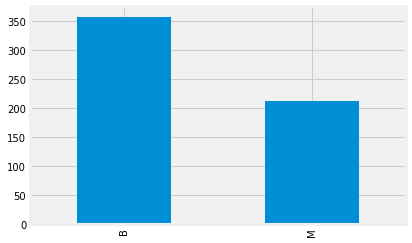

In [0]:
df.diagnosis.value_counts().plot(kind= 'bar');

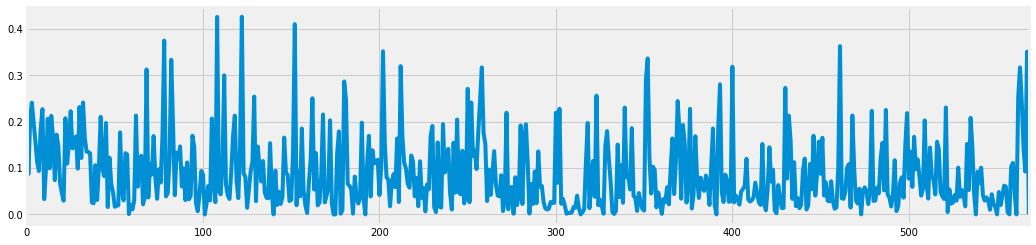

In [0]:
fig, ax = plt.subplots(figsize =(16,4))
df.concavity_mean.plot()

In [0]:
malignant = df[df.diagnosis == 'M']
benign = df[df.diagnosis == 'B']

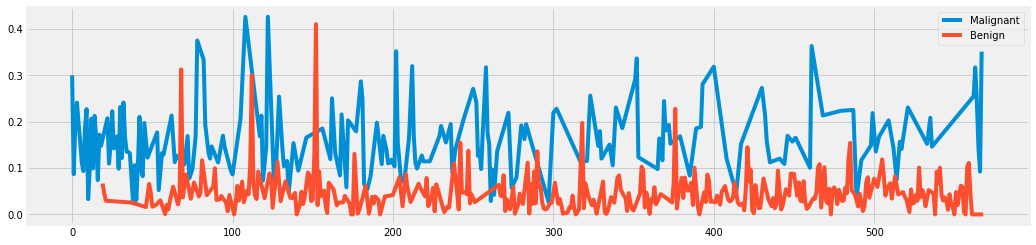

In [0]:
fig, ax = plt.subplots(figsize =(16,4))
plt.plot(malignant.concavity_mean, label = 'Malignant')
plt.plot(benign.concavity_mean, label = 'Benign')
plt.legend();

## Step 4: Model Data

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report


In [0]:
## Seperate out features and labels

X = df.drop(columns=['diagnosis'])
y = df.diagnosis

In [45]:
sc = StandardScaler()
X = sc.fit_transform(X)


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [0]:
## Since machines understand language of either 0 or 1, you have to provide them data in that language only.
## So convert M to 0 and B to 1

le = LabelEncoder()
y = le.fit_transform(y)

In [0]:
## Set aside Training and test data for validation of our model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True, random_state = 42)

In [55]:
## checking out shape of the variables for traiing and test

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((512, 31), (512,), (57, 31), (57,))

In [0]:
from tensorflow.keras.layers import Dense, Flatten, Activation, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [0]:
model = Sequential()

model.add(Dense(32, input_shape=(31,)))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [0]:
model.compile(loss = 'binary_crossentropy' , metrics=['accuracy'], optimizer=Adam(lr=0.0001))

In [57]:
model.fit(X_train, y_train, validation_split = 0.1, epochs= 50, verbose =1, batch_size = 8)

Train on 460 samples, validate on 52 samples
Epoch 1/50
460/460 [==============================] - 0s 673us/sample - loss: 0.0863 - accuracy: 0.9848 - val_loss: 0.0407 - val_accuracy: 0.9808
Epoch 2/50
460/460 [==============================] - 0s 200us/sample - loss: 0.0940 - accuracy: 0.9848 - val_loss: 0.0406 - val_accuracy: 0.9808
Epoch 3/50
460/460 [==============================] - 0s 191us/sample - loss: 0.0856 - accuracy: 0.9783 - val_loss: 0.0401 - val_accuracy: 0.9808
Epoch 4/50
460/460 [==============================] - 0s 201us/sample - loss: 0.0773 - accuracy: 0.9891 - val_loss: 0.0400 - val_accuracy: 0.9808
Epoch 5/50
460/460 [==============================] - 0s 192us/sample - loss: 0.0785 - accuracy: 0.9870 - val_loss: 0.0395 - val_accuracy: 0.9808
Epoch 6/50
460/460 [==============================] - 0s 198us/sample - loss: 0.0757 - accuracy: 0.9826 - val_loss: 0.0391 - val_accuracy: 1.0000
Epoch 7/50
460/460 [==============================] - 0s 203us/sample - loss: 0

## Step 5: Evaluating Model

In [0]:
y_pred = model.predict(X_test) ## we perform prediction on the validation set kept aside in step 4

In [0]:
y_pred = (y_pred >= 0.5).astype(int)

<b> Metric for evaluation: Confusion Matrix </b>

In [62]:
confusion_matrix( y_test, y_pred) ## for validation set

array([[40,  0],
       [ 1, 16]])

## Step 9: Conclusion:



1. What are the factors that contribute to malignant and benign tumor? : Answer Given in Step 8
2. Is the problem stated as classification or regression problem?: Classification
3. Our final model is capable enough to predict the diffence between two types?: Our model is more than >94% accurate

## Step 10: Communicate

Create a powerpoint and communicate your findings